In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd
import numpy as np
import os
import math
from datetime import datetime

In [38]:
baseDir = "/home/hardyvalen/public/semester7/ta/proyekta/UserTesting"
analyticsFile = "analytics-skimmed.json"
formFile = "form-data.csv"

In [3]:
def unique(list1):
  
    # initialize a null list
    unique_list = []
  
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return unique_list
        
# driver code
list1 = ["10", "20", "10", "30", "40", "40"]
print("the unique values from 1st list is")
print(", ".join(unique(list1)))

the unique values from 1st list is
10, 20, 30, 40


In [4]:
analyticsJSON = json.load(open(os.path.join(baseDir, analyticsFile)))

In [5]:
formFileCSV = pd.read_csv(os.path.join(baseDir, formFile))

In [6]:
# analyticsJSON
#   _id <class 'str'>
#   data <class 'dict'>
#     playback <class 'list'>
#       time <class 'float'>
#       timeToEnd <class 'float'>
#       timestamp <class 'int'>
#       bitrate <class 'int'>
#       frameRate <class 'str'>
#       resolution <class 'str'>
#       bufferStateVideo <class 'dict'>
#         target <class 'int'>
#         state <class 'str'>
#       bufferStateAudio <class 'dict'>
#         target <class 'int'>
#         state <class 'str'>
#       bufferLevelVideo <class 'int'>
#       bufferLevelAudio <class 'float'>
#     video <class 'dict'>
#       videoStatus <class 'dict'>
#         code <class 'int'>
#         message <class 'str'>
#       _id <class 'str'>
#       fieldname <class 'str'>
#       objectname <class 'str'>
#       originalname <class 'str'>
#       videoDescription <class 'str'>
#       size <class 'int'>
#       createdAt <class 'int'>
#       updatedAt <class 'int'>
# __v <class 'int'>
#     initTimestamp <class 'int'>
#   createdAt <class 'int'>
#   updatedAt <class 'int'>
#   __v <class 'int'>

# list = analyticsJSON[0]['data']['video']['videoStatus']
# for el in list.keys():
#     print (el, type(list[el]))

playback = []
for idx, el in enumerate(analyticsJSON):
    playback.append([idx, el["_id"], len(el["data"]["playback"])])
    
def takeLen(elem):
    return elem[2]

# Get top 5 data by playback length 
playback.sort(key=takeLen, reverse=True)
playback[0:5]

[[16, '62fd00d34107eb7ea40c56be', 2579],
 [28, '62fe066e4107eb7ea40c56d5', 2543],
 [39, '62fe467d4107eb7ea40c56ef', 2480],
 [44, '62fe4f294107eb7ea40c56f9', 2380],
 [34, '62fe14fd64b3534a6e7022dc', 2077]]

#### 01 - GENERATE PLOT OF TIMESTAMP AND VIDEO BUFFER LEVEL

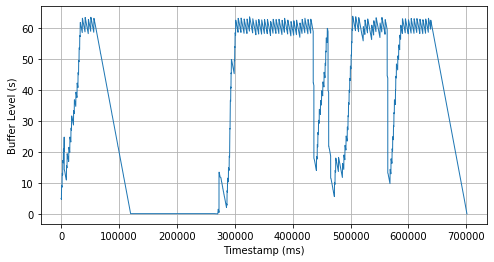

In [7]:
a1 = analyticsJSON[34]["data"]
a1_playback = a1["playback"]

x = []
y1 = []

# Set the first timestamp
ts_init = a1_playback[0]["timestamp"]

for el in a1_playback:
    x.append(el["timestamp"] - ts_init)
    y1.append(el["bufferLevelVideo"])
    
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y1, linewidth=1)
plt.ylabel("Buffer Level (s)")
plt.xlabel("Timestamp (ms)")
plt.grid(visible=True)
plt.show()

#### 02 - GENERATE PLOT OF TIMESTAMP AND BITRATE

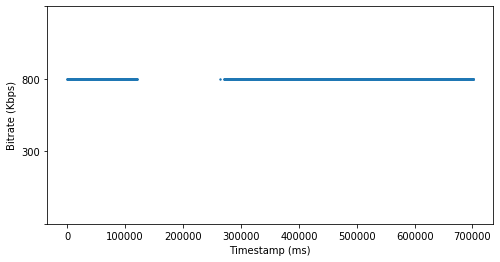

In [8]:
a2 = analyticsJSON[34]["data"]
a2_playback = a2["playback"]

x = []
y1 = []

# Set the first timestamp
ts_init = a2_playback[0]["timestamp"]

for el in a2_playback:
    x.append(el["timestamp"] - ts_init)
    y1.append(el["bitrate"])
    
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y1, s=2)

yticks = ["", "800", "300", ""]
plt.yticks([1300000, 800000, 300000, -200000], yticks)
plt.ylabel("Bitrate (Kbps)")
plt.xlabel("Timestamp (ms)")
plt.show()

#### 03 - GENERATE PLOT OF TIMESTAMP AND VIDEO BUFFER STATE

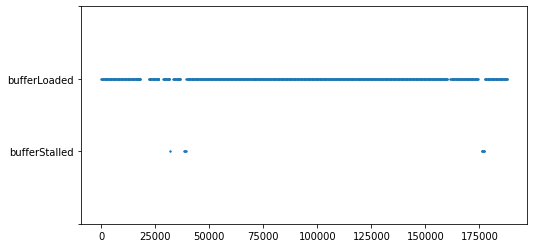

In [9]:
# ['bufferLoaded', 'bufferStalled']

a3 = analyticsJSON[32]["data"]
a3_playback = a3["playback"]

x = []
y1 = []

# Set the first timestamp
ts_init = a3_playback[0]["timestamp"]

def stateToInt(x):
    if (x == 'bufferLoaded'):
        return 1
    else: 
        return 0

for el in a3_playback:
    x.append(el["timestamp"] - ts_init)
    y1.append(stateToInt(el["bufferStateVideo"]['state']))
    
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y1, s=2)

yticks=["", "bufferLoaded", "bufferStalled", ""]
plt.yticks([2, 1, 0, -1], yticks)
plt.show()

# get unique results
# [res.append(x) for x in y1 if x not in res]


#### Form Response
0. Timestamp
1. Nama Responden
2. Persetujuan Pengujian
3. Download Speed
4. Idle Latency
5. Download Latency
6. Apakah video dapat diputar?
7. Pada saat pemutaran, apakah gambar pada video terdapat distorsi yang mengganggu pemutaran video?
8. Pada saat pemutaran, apakah terjadi kejadian video dan audio tidak sinkron?
9. Pada saat pemutaran, apakah terjadi kejadian buffering / loading video yang mengganggu kenyamanan anda?
10. Jika terdapat buffering, jenis buffering apakah yang Anda alami pada pemutaran video? 
11. Hal apa yang membuat kejadian buffering tersebut mengganggu kenyamanan Anda saat menonton video?
12. Analytics ID (isian)
13. Terlepas dari tampilan website (secara fungsional), berapa nilai kualitas pemutaran video yang Anda tonton?

In [11]:
# Analytics ID from form
analyticsIDfromForm = []

analyticsIDfromJSON = [el["_id"] for el in analyticsJSON]
    
# append form object to analytics object
for idx, el in formFileCSV.iterrows():
    if isinstance(el.iloc[12], float):
        continue
    
    tmp = el.iloc[12].split(",")
    for el2 in tmp:
        # Search an entry of analyticsJSON where id = el2
        id = el2.strip()
        
        # Add tmp_dict to the object
        tmp_dict = {
            "form_submit_timestamp": el.iloc[0],
            "nama_responden": el.iloc[1],
            "consent": el.iloc[2],
            "download_speed": el.iloc[3],
            "idle_latency": el.iloc[4],
            "download_latency": el.iloc[5],
            "video_is_playable": el.iloc[6],
            "video_has_distortion": el.iloc[7],
            "video_has_unsynchronized_audio": el.iloc[8],
            "video_has_uncomfortable_buffering": el.iloc[9],
            "uncomfortable_buffering_type": el.iloc[10],
            "reason_for_inconvenience": el.iloc[11],
            "mos": el.iloc[13]
        }

        analyticsJSON[analyticsIDfromJSON.index(id)]["form_data"] = tmp_dict
# analyticsJSON[32]["form_data"]

list = analyticsJSON[0]['form_data']
for el in list.keys():
    print (el, type(list[el]))

# get data from df
# formFileCSV.loc[1]

form_submit_timestamp <class 'str'>
nama_responden <class 'str'>
consent <class 'str'>
download_speed <class 'str'>
idle_latency <class 'str'>
download_latency <class 'str'>
video_is_playable <class 'str'>
video_has_distortion <class 'str'>
video_has_unsynchronized_audio <class 'str'>
video_has_uncomfortable_buffering <class 'str'>
uncomfortable_buffering_type <class 'float'>
reason_for_inconvenience <class 'float'>
mos <class 'float'>


#### Dump some of the data to pyplot table

['2997/100']
['640 x 480']


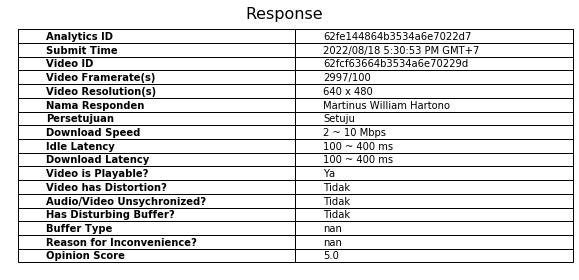

In [12]:
# for el in analyticsJSON:
    
el = analyticsJSON[32]
framerates = []
for el2 in el["data"]["playback"]:
    if el2["frameRate"] not in framerates:
        framerates.append(el2["frameRate"])
        
resolutions = []
for el2 in el["data"]["playback"]:
    if el2["resolution"] not in resolutions:
        resolutions.append(el2["resolution"])

print(framerates)
print(resolutions)

cell = [
    ["Analytics ID", el["_id"]],
    ["Submit Time", el["form_data"]["form_submit_timestamp"]],
    ["Video ID", el["data"]["video"]["_id"]],
    ["Video Framerate(s)", ",".join(framerates)],
    ["Video Resolution(s)", ",".join(resolutions)],
    ["Nama Responden", el["form_data"]["nama_responden"]],
    ["Persetujuan", el["form_data"]["consent"]],
    ["Download Speed", el["form_data"]["download_speed"]],
    ["Idle Latency", el["form_data"]["idle_latency"]],
    ["Download Latency", el["form_data"]["download_latency"]],
    ["Video is Playable?", el["form_data"]["video_is_playable"]],
    ["Video has Distortion?", el["form_data"]["video_has_distortion"]],
    ["Audio/Video Unsychronized?", el["form_data"]["video_has_unsynchronized_audio"]],
    ["Has Disturbing Buffer?", el["form_data"]["video_has_uncomfortable_buffering"]],
    ["Buffer Type", el["form_data"]["uncomfortable_buffering_type"]],
    ["Reason for Inconvenience?", el["form_data"]["reason_for_inconvenience"]],
    ["Opinion Score", el["form_data"]["mos"]],
]

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Response", fontSize=16)
ax.set_axis_off()

table = ax.table(
    cellText=cell,
    cellLoc="left",
    loc="upper left"
)

# Set first col font to bold
for (row, col), cell in table.get_celld().items():
    if (col == 0):
        cell.set_text_props(fontproperties=FontProperties(weight="bold"))
        
# hide axes
fig.patch.set_visible(False)

fig.tight_layout()
plt.show()

#### Plot Figures
* Fig 1 = Table
* Fig 2 = Video Buffer Level
* Fig 3 = Video Bitrate
* Fig 4 = Video Buffer State
* Fig 5 = Audio Buffer Level
* Fig 7 = Audio Buffer State

In [20]:
# 01. GENERATE TABLES

for el in analyticsJSON:
    framerates = []
    for el2 in el["data"]["playback"]:
        if el2["frameRate"] not in framerates:
            framerates.append(el2["frameRate"])

    resolutions = []
    for el2 in el["data"]["playback"]:
        if el2["resolution"] not in resolutions:
            resolutions.append(el2["resolution"])
            
    rebuf_arr = []
    playback = el["data"]["playback"]
    for i in range (len(playback)):
        el2 = playback[i]
        if (el2["bufferStateVideo"] == None):
            continue;
        if (el2["bufferStateVideo"]["state"] == "bufferStalled"):
        # Check if stalled is on the last index. if so, don't append.:
            if (i != len(playback) - 1):
                rebuf_arr.append(playback[i + 1]["timestamp"] - el2["timestamp"])
    
    if (len(playback) == 0): 
        continue;
    
    video_duration = playback[0]["time"] + playback[0]["timeToEnd"]
    rebuf_time = sum(rebuf_arr)
    initbuf_time = playback[0]["timestamp"] - el["data"]["initTimestamp"]
    buftotal_time = initbuf_time + rebuf_time
    stream_time = playback[-1]["timestamp"] - el["data"]["initTimestamp"]
    buffer_ratio = round((buftotal_time / (stream_time + buftotal_time)) * 100, 2)
        
    # Remove "Nama Responden" on Public data
    cell = [
        ["Nama Responden", el["form_data"]["nama_responden"]],
        ["Analytic ID", el["_id"]],
        ["Video ID", el["data"]["video"]["_id"]],
        ["Video Framerate(s)", ",".join(framerates)],
        ["Video Resolution(s)", ",".join(resolutions)],
        ["Persetujuan", el["form_data"]["consent"]],
        ["Download Speed", el["form_data"]["download_speed"]],
        ["Idle Latency", el["form_data"]["idle_latency"]],
        ["Download Latency", el["form_data"]["download_latency"]],
        ["Video is Playable?", el["form_data"]["video_is_playable"]],
        ["Video has Distortion?", el["form_data"]["video_has_distortion"]],
        ["Audio/Video Unsychronized?", el["form_data"]["video_has_unsynchronized_audio"]],
        ["Has Disturbing Buffer?", el["form_data"]["video_has_uncomfortable_buffering"]],
        ["Buffer Type", el["form_data"]["uncomfortable_buffering_type"]],
        ["Opinion Score", el["form_data"]["mos"]],
        ["Submit Time", el["form_data"]["form_submit_timestamp"]],
        ["Video Duration", str(round(video_duration, 2)) + "s"],
        ["Initial Buffering Duration", str(round(initbuf_time / 1000, 2)) + "s"],
        ["Re-buffering Duration", str(round(rebuf_time / 1000, 2)) + "s"],
        ["Total Buffer Duration", str(round(buftotal_time / 1000, 2)) + "s"],
        ["Streaming Duration", str(round(stream_time / 1000, 2)) + "s"],
        ["Buffer Ratio", str(buffer_ratio) + "%"]
    ]
    
    fig1, ax1 = plt.subplots(figsize=(6, 4.8))
#     ax1.set_title("Response " + el["_id"], fontSize=16)
    ax1.set_axis_off()

    table = ax1.table(
        cellText=cell,
        cellLoc="left",
        loc="upper left"
    )

    # Set first col font to bold
    for (row, col), cell in table.get_celld().items():
        if (col == 0):
            cell.set_text_props(fontproperties=FontProperties(weight="bold"))

    # hide axes
    fig1.patch.set_visible(False)

    fig1.tight_layout()
    plt.close(fig1)
    fig1.savefig("figures/private/table/" + el["_id"])

In [18]:
# 02. GENERATE VIDEO BUFFER LEVEL TIMEPLOTS

for el in analyticsJSON:
    x = []
    y = []
    
    if (len(el["data"]["playback"]) == 0):
        continue
    ts_init = el["data"]["playback"][0]["timestamp"]
    
    for el2 in el["data"]["playback"]:
        x.append(el2["timestamp"] - ts_init)
        y.append(el2["bufferLevelVideo"])
    
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x, y, linewidth=1)
    
    plt.ylabel("Video Buffer Level (s)")
    plt.xlabel("Timestamp (ms)")
    plt.grid(visible=True)
#     ax.set_title("Video Buffer Level Timeplot of " + el["_id"] + "\n" + el["form_data"]["nama_responden"], fontSize=12)
    ax.set_title("Video Buffer Level Timeplot of " + el["_id"], fontSize=12)
    plt.close(fig)
#     fig.savefig("figures/private/vbufferlevel/" + el["_id"])
    fig.savefig("figures/public/vbufferlevel/" + el["_id"])
    

In [22]:
# 03. GENERATE VIDEO BITRATE TIMEPLOTS

for el in analyticsJSON:
    x = []
    y = []
    
    if (len(el["data"]["playback"]) == 0):
        continue
    ts_init = el["data"]["playback"][0]["timestamp"]
    
    for el2 in el["data"]["playback"]:
        x.append(el2["timestamp"] - ts_init)
        y.append(el2["bitrate"])
    
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(x, y, s=2)
    
    yticks = ["", "800", "300", ""]
    plt.yticks([1300000, 800000, 300000, -200000], yticks)
    plt.ylabel("Video Bitrate (Kbps)")
    plt.xlabel("Timestamp (ms)")
    
    ax.set_title("Video Bitrate Timeplot " + el["_id"], fontSize=12)
#     ax.set_title("Video Bitrate Timeplot " + el["_id"] + "\n" + el["form_data"]["nama_responden"], fontSize=12)
    plt.close(fig)
    fig.savefig("figures/public/vbitrate/" + el["_id"])
#     fig.savefig("figures/private/vbitrate/" + el["_id"])

In [24]:
# 04. GENERATE VIDEO BUFFER STATE TIMEPLOTS

for el in analyticsJSON:
#     if (len(el["data"]["playback"]) != 0):
#         print(el["data"]["playback"][0]["bufferStateVideo"] == None)
    x = []
    y = []
    
    if (len(el["data"]["playback"]) == 0):
        continue
        
#     if (el["data"]["playback"][0]["bufferStateVideo"] == None):
#         print(el["_id"] + " " + el["form_data"]["nama_responden"])
#         continue
    
    ts_init = el["data"]["playback"][0]["timestamp"]
    
    def stateToInt(x):
        if (x == 'bufferLoaded'):
            return 1
        else: 
            return 0
    
    for el2 in el["data"]["playback"]:
        if (el2["bufferStateVideo"] == None):
            continue
            
        x.append(el2["timestamp"] - ts_init)
        y.append(stateToInt(el2["bufferStateVideo"]["state"]))
    
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(x, y, s=2)
    
    yticks=["", "Loaded", "Stalled", ""]
    plt.yticks([2, 1, 0, -1], yticks)
    plt.ylabel("Video Buffer State")
    plt.xlabel("Timestamp (ms)")
    
    ax.set_title("Video Buffer Level Timeplot " + el["_id"] + "\n" + el["form_data"]["nama_responden"], fontSize=12)
#     ax.set_title("Video Buffer Level Timeplot " + el["_id"], fontSize=12)
    plt.close(fig)
    fig.savefig("figures/private/vbufferstate/" + el["_id"])
#     fig.savefig("figures/public/vbufferstate/" + el["_id"])

In [29]:
# 05. GENERATE AUDIO BUFFER LEVEL TIMEPLOT
for el in analyticsJSON:
    x = []
    y = []
    
    if (len(el["data"]["playback"]) == 0):
        continue
    ts_init = el["data"]["playback"][0]["timestamp"]
    
    for el2 in el["data"]["playback"]:
        x.append(el2["timestamp"] - ts_init)
        y.append(el2["bufferLevelAudio"])
    
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x, y, linewidth=1)
    
    plt.ylabel("Audio Buffer Level (s)")
    plt.xlabel("Timestamp (ms)")
    plt.grid(visible=True)
#     ax.set_title("Audio Buffer Level Timeplot of " + el["_id"] + "\n" + el["form_data"]["nama_responden"], fontSize=12)
    ax.set_title("Audio Buffer Level Timeplot of " + el["_id"], fontSize=12)
    plt.close(fig)
#     fig.savefig("figures/private/abufferlevel/" + el["_id"])
    fig.savefig("figures/public/abufferlevel/" + el["_id"])    

In [28]:
# 06. GENERATE AUDIO BUFFER STATE TIMEPLOT
for el in analyticsJSON:
    x = []
    y = []
    
    if (len(el["data"]["playback"]) == 0):
        continue
    
    ts_init = el["data"]["playback"][0]["timestamp"]
    
    def stateToInt(x):
        if (x == 'bufferLoaded'):
            return 1
        else: 
            return 0
    
    for el2 in el["data"]["playback"]:
        if (el2["bufferStateAudio"] == None):
            continue
            
        x.append(el2["timestamp"] - ts_init)
        y.append(stateToInt(el2["bufferStateAudio"]["state"]))
    
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(x, y, s=2)
    
    yticks=["", "Loaded", "Stalled", ""]
    plt.yticks([2, 1, 0, -1], yticks)
    plt.ylabel("Audio Buffer State")
    plt.xlabel("Timestamp (ms)")
    
#     ax.set_title("Audio Buffer Level Timeplot " + el["_id"] + "\n" + el["form_data"]["nama_responden"], fontSize=12)
    ax.set_title("Audio Buffer Level Timeplot " + el["_id"], fontSize=12)
    plt.close(fig)
#     fig.savefig("figures/private/abufferstate/" + el["_id"])
    fig.savefig("figures/public/abufferstate/" + el["_id"])    

In [8]:
# DATA PREP FOR PIE CHART AND TABLE
mos = []

for idx, row in formFileCSV.iterrows():
    if (math.isnan(row.iloc[13])):
        mos.append(int(1))
        continue
    mos.append(int(row.iloc[13]))

mosCount = np.array([0, 0, 0, 0, 0])
for el in mos:
    mosCount[el - 1] += 1

# [[1, 4], [2, 0], [3, 3], [4, 8], [5, 38]]
mosCount2 = [["Absolute Category Rating", "Jumlah"]]
for idx, el in enumerate(mosCount):
    mosCount2.append([idx + 1, el])


mosCount2.append(["Jumlah Responden", 53])
mosCount2.append(["MOS", "{:.3f}".format(np.mean(mos))])
# df = pd.DataFrame(mosCount2, columns=list(["ACR", "Jumlah"]))

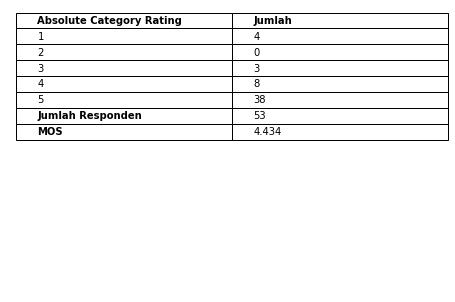

In [100]:
# SUMMARY TABLE
fig, ax = plt.subplots()
ax.set_axis_off()

table = ax.table(
    cellText=mosCount2, 
    cellLoc="left",
    loc="upper left"
)

for (row, col), cell in table.get_celld().items():
    if (row == 0 or (row > 5 and col == 0)):
        cell.set_text_props(font_properties=FontProperties(weight="bold"))

fig.patch.set_visible(False)
fig.tight_layout(pad=0)
# plt.close(fig)

plt.margins(0, 0)
plt.savefig("figures/02-mos-table.png", dpi=100, bbox_inches="tight", pad_inches=0, interpolation="nearest")

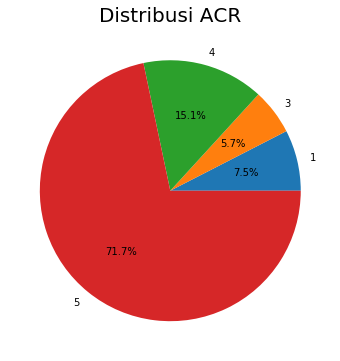

In [10]:
# PIE DIAGRAM
labels = "1", "3", "4", "5"
for el in mos:
    mosCount[el - 1] += 1

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(mosCount[mosCount != 0], labels=labels, autopct='%1.1f%%')
ax.set_title("Distribusi ACR", fontSize=20)

plt.savefig("figures/01-acr-pie.png", dpi=100)

In [41]:
# Buffer Ratio
tmp = analyticsJSON[34]
arr = []

for el in tmp["data"]["playback"]:
    if (el["bufferLevelVideo"] == 0):
        arr.append(el["timestamp"])

# Get initial buffer time on milliseconds
init_buffer_time = tmp["data"]["playback"][0]["timestamp"] - tmp["data"]["initTimestamp"]
print(init_buffer_time)

# Append all rebuffering time
print(arr)

# print((tmp["data"]["playback"][0]["timestamp"]))

# tmp["data"]["playback"][0]["bufferLevelVideo"]
tmp.keys()

2122
[1660818244180, 1660818674561]


dict_keys(['_id', 'data', 'createdAt', 'updatedAt', '__v', 'form_data'])

In [123]:
arr2 = []

# for el in analyticsJSON:
#     arr = []
#     for idx, el2 in enumerate(el["data"]["playback"]):
#         if (el2["bufferLevelVideo"] == 0):
# #         if (el2["bufferStateVideo"]):
# #             continue
# #         if (el2["bufferStateVideo"]["state"] == "bufferStalled"):
#             arr.append(el2["timestamp"])
# #     print(el["form_data"]["nama_responden"])
#     arr2.append([el["form_data"]["nama_responden"], arr, len(arr)])

# arr2

# for i in range (5):
#     print(i)

for el in analyticsJSON:
    rebuf_arr = []
    playback = el["data"]["playback"]
    for i in range (len(playback)):
        el2 = playback[i]
        if (el2["bufferStateVideo"] == None):
            continue;
        if (el2["bufferStateVideo"]["state"] == "bufferStalled"):
        # Check if stalled is on the last index. if so, don't append.:
            if (i != len(playback) - 1):
                rebuf_arr.append(playback[i + 1]["timestamp"] - el2["timestamp"])
    if (len(playback) == 0): 
        continue;
        
    rebuf_time = sum(rebuf_arr)
    initbuf_time = playback[0]["timestamp"] - el["data"]["initTimestamp"]
    buftotal_time = initbuf_time + rebuf_time
    stream_time = playback[-1]["timestamp"] - el["data"]["initTimestamp"]
    arr2.append({
        "Analytics ID": el["_id"], 
        "Rebuffering time": rebuf_time,
        "Initial buffer time": initbuf_time,
        "Total buffer time": buftotal_time,
        "Streaming time": stream_time,
        "Buffer ratio": buftotal_time / (stream_time + buftotal_time)
    })
# analyticsJSON[34]["data"]["playback"][0]["timestamp"]

# arr2
# analyticsJSON[1]["form_data"]["nama_responden"]

[{'Analytics ID': '62fc8e1c64b3534a6e702273',
  'Rebuffering time': 0,
  'Initial buffer time': 1663,
  'Total buffer time': 1663,
  'Streaming time': 2771,
  'Buffer ratio': 0.37505638249887235},
 {'Analytics ID': '62fca3e0c4995f31ff0309d9',
  'Rebuffering time': 0,
  'Initial buffer time': 522,
  'Total buffer time': 522,
  'Streaming time': 389179,
  'Buffer ratio': 0.0013394884796292543},
 {'Analytics ID': '62fcb0a664b3534a6e702289',
  'Rebuffering time': 0,
  'Initial buffer time': 1056,
  'Total buffer time': 1056,
  'Streaming time': 78511,
  'Buffer ratio': 0.013271833800444909},
 {'Analytics ID': '62fcb3c84107eb7ea40c56a3',
  'Rebuffering time': 0,
  'Initial buffer time': 1575,
  'Total buffer time': 1575,
  'Streaming time': 155995,
  'Buffer ratio': 0.009995557529986673},
 {'Analytics ID': '62fcb740c4995f31ff0309ef',
  'Rebuffering time': 0,
  'Initial buffer time': 2102,
  'Total buffer time': 2102,
  'Streaming time': 56091,
  'Buffer ratio': 0.03612118296014984},
 {'Anal

In [45]:
# Remove "Nama Responden" data for public and save it to JSON
# x = [{"a": 1, "b": 3}, {"a": 1, "b": 2}]
# for el in x:
#     el.pop('a', None)

analyticsJSON2 = analyticsJSON;

for el in analyticsJSON:
    el["form_data"].pop("nama_responden", None)
    
f = open("analytics-skimmed-public.json", "w")
f.write(json.dumps(analyticsJSON2))
f.close()